In [1]:
!pip install atspy
# !pip install pigar

In [1]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from atspy import AutomatedModel
from sklearn.metrics import mean_squared_error
print (pd.__version__)
pd.set_option("max_rows", None)
sns.set_style("darkgrid")
sns.set_style("ticks", {"xtick.major.size": 16, "ytick.major.size": 16})

INFO:root:Using GPU


0.25.3


In [2]:
#Chech if we have data for all weeks
def missing_days(data):
    days = data['date'].max() - data['date'].min()
    assert days.days == data.shape[0]-1, 'Missing Days'

data = pd.read_csv('data/covid_19_data.csv')
data = data[['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
data.columns = ['date', 'country', 'confirmed', 'deaths', 'recovered']
data = data.groupby(['date', 'country'], as_index=False).sum()
data['active'] = data['confirmed'] - data['recovered'] - data['deaths']
data['date'] = pd.to_datetime(data['date'])
print('Length of Data :', len(data))

#Isolate top n countries with the most confirmed cases
top_n_country_names = data.groupby('country').max()['confirmed'].nlargest(10).keys()
top_n = data [data['country'].isin(top_n_country_names)]
print('Length of Top 10 :', len(top_n))
# top_n.groupby('country').apply(missing_days)

#Add population
population = pd.read_csv('data/population_by_country_2020.csv')
population = population.iloc[:, :2]
population.columns = ['country', 'population']
population['country'].unique()
map_countries = {
    'China' : 'Mainland China',
    'United States' : 'US',
    'United Kingdom' : 'UK'
}
population['country'].replace(map_countries, inplace=True)

top_n = pd.merge(top_n, population, on=['country'])
top_n['population_percentage'] = (top_n['active'] / top_n['population']) * 100

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


Length of Data : 11859
Length of Top 10 : 884


In [3]:
#Find Start and finish Date
start_date = data.groupby('country').min()['date'].min()
end_date = data.groupby('country').max()['date'].max()
date_range = pd.date_range(start_date, end_date, freq='D')
print ("Start Date : ", start_date)
print ("End Date : ", end_date)

Start Date :  2020-01-22 00:00:00
End Date :  2020-05-04 00:00:00


<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971380120
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657970995496
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971441280
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971441392
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971440048
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training


Model Gluonts is being trained for in sample prediction


INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.13it/s, avg_epoch_loss=-9.16]
INFO:root:Epoch[0] Elapsed time 2.920 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-9.162456
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 18.26it/s, avg_epoch_loss=-10.5]
INFO:root:Epoch[1] Elapsed time 2.743 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-10.466536
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.70it/s, avg_epoch_loss=-10.9]
INFO:root:Epoch[2] Elapsed time 2.827 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-10.865431
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.63it/s, avg_epoch_loss=-11.1]
INFO:root:Epoch[3] Elapsed time 2.844 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-11.146478
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.56it/s, avg_epoch_loss=-11.4]
INFO:root:Epo

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968104504
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968104280
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968106744
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968156912
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968159096
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 37.81it/s, avg_epoch_loss=-6.78]
INFO:root:Epoch[0] Elapsed time 1.327 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-6.776234
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.47it/s, avg_epoch_loss=-7.87]
INFO:root:Epoch[1] Elapsed time 1.239 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-7.874545
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.89it/s, avg_epoch_loss=-8.53]
INFO:root:Epoch[2] Elapsed time 1.225 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-8.530408
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.24it/s, avg_epoch_loss=-8.76]
INFO:root:Epoch[3] Elapsed time 1.245 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-8.760187
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.94it/s, avg_epoch_loss=-8.64]
INFO:root:Epoch[4] Elapsed time 1.225 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US
ARIMA,0.007421
Prophet,0.013877
HWAAS,0.172957
NBEATS,0.036958
Gluonts,0.044805
TBAT,0.009873


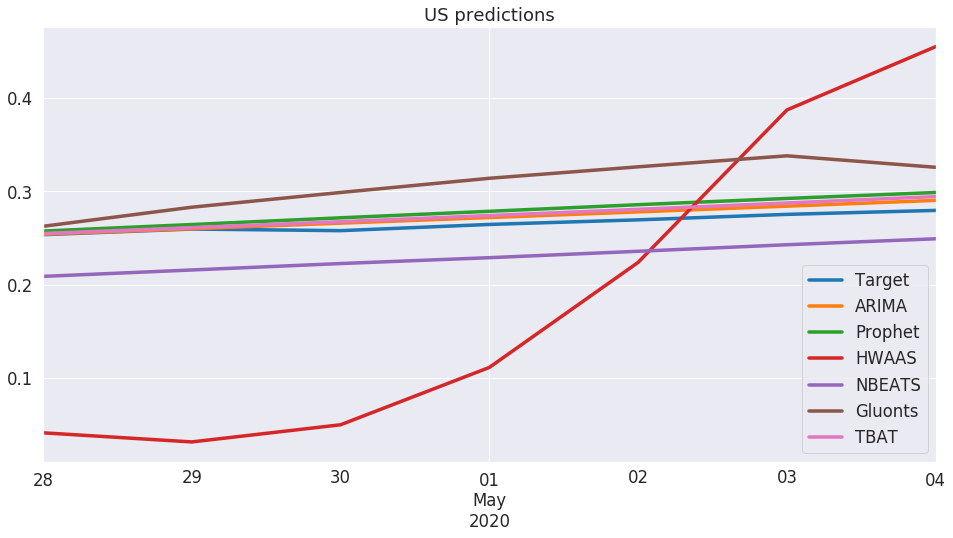

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968571336
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657970996000
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971440776
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971202592
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971441392
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.26it/s, avg_epoch_loss=-6.79]
INFO:root:Epoch[0] Elapsed time 3.077 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-6.794147
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.24it/s, avg_epoch_loss=-8.43]
INFO:root:Epoch[1] Elapsed time 2.904 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-8.427421
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.57it/s, avg_epoch_loss=-8.88]
INFO:root:Epoch[2] Elapsed time 2.847 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-8.875181
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.60it/s, avg_epoch_loss=-9.23]
INFO:root:Epoch[3] Elapsed time 2.849 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-9.228028
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.98it/s, avg_epoch_loss=-9

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657971828832
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998422960
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998422064
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998850688
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998851192
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 38.78it/s, avg_epoch_loss=-4.71]
INFO:root:Epoch[0] Elapsed time 1.293 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-4.713981
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.12it/s, avg_epoch_loss=-5.8]
INFO:root:Epoch[1] Elapsed time 1.219 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-5.796745
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.40it/s, avg_epoch_loss=-6.24]
INFO:root:Epoch[2] Elapsed time 1.217 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-6.238189
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.93it/s, avg_epoch_loss=-6.27]
INFO:root:Epoch[3] Elapsed time 1.226 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-6.269425
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.36it/s, avg_epoch_loss=-6.55]
INFO:root:Epoch[4] Elapsed time 1.212 seconds
INFO:root:Epo

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain
ARIMA,0.007421,0.080094
Prophet,0.013877,0.065433
HWAAS,0.172957,0.031497
NBEATS,0.036958,0.050492
Gluonts,0.044805,0.108842
TBAT,0.009873,0.029295


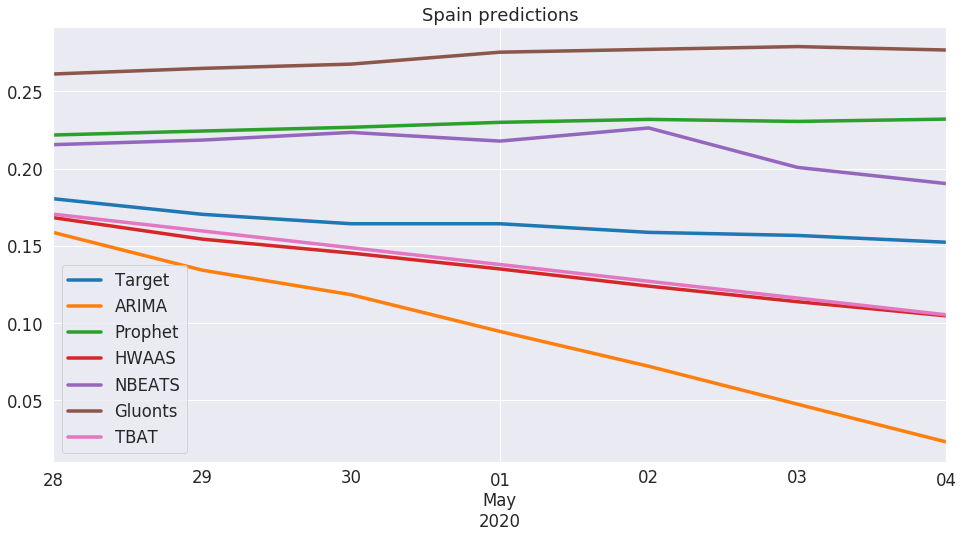

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971438312
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001261432
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139661771739264
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001167448
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001165488
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.36it/s, avg_epoch_loss=-5.06]
INFO:root:Epoch[0] Elapsed time 3.060 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-5.055609
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.79it/s, avg_epoch_loss=-6.8]
INFO:root:Epoch[1] Elapsed time 2.814 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-6.801935
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.53it/s, avg_epoch_loss=-7.19]
INFO:root:Epoch[2] Elapsed time 2.854 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-7.193535
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.57it/s, avg_epoch_loss=-7.44]
INFO:root:Epoch[3] Elapsed time 2.849 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-7.442666
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.94it/s, avg_epoch_loss=-7.

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968622560
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970996616
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970999192
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970999080
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970997512
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 38.02it/s, avg_epoch_loss=-4.51]
INFO:root:Epoch[0] Elapsed time 1.318 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-4.514270
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 41.34it/s, avg_epoch_loss=-5.64]
INFO:root:Epoch[1] Elapsed time 1.211 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-5.642689
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.41it/s, avg_epoch_loss=-6.14]
INFO:root:Epoch[2] Elapsed time 1.241 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-6.141780
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.98it/s, avg_epoch_loss=-6.21]
INFO:root:Epoch[3] Elapsed time 1.222 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-6.210931
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.39it/s, avg_epoch_loss=-6.35]
INFO:root:Epoch[4] Elapsed time 1.246 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy
ARIMA,0.007421,0.080094,0.005628
Prophet,0.013877,0.065433,0.019217
HWAAS,0.172957,0.031497,0.006616
NBEATS,0.036958,0.050492,0.008645
Gluonts,0.044805,0.108842,0.043551
TBAT,0.009873,0.029295,0.005810


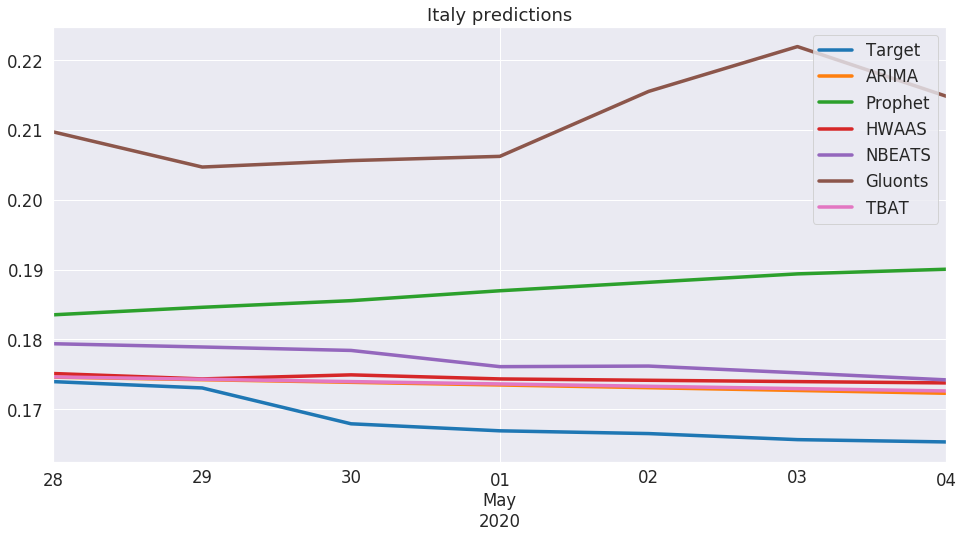

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968621664
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967756288
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967759200
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001209752
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139658013996032
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:02<00:00, 16.78it/s, avg_epoch_loss=-8.25]
INFO:root:Epoch[0] Elapsed time 2.982 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-8.249672
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.65it/s, avg_epoch_loss=-9.58]
INFO:root:Epoch[1] Elapsed time 2.837 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-9.584035
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.73it/s, avg_epoch_loss=-10]
INFO:root:Epoch[2] Elapsed time 2.823 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-10.006463
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.59it/s, avg_epoch_loss=-10.3]
INFO:root:Epoch[3] Elapsed time 2.846 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-10.320130
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.74it/s, avg_epoch_loss=-1

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998209464
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656999952680
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656999952792
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998210024
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001110776
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 37.97it/s, avg_epoch_loss=-5.76]
INFO:root:Epoch[0] Elapsed time 1.320 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-5.764325
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.04it/s, avg_epoch_loss=-6.89]
INFO:root:Epoch[1] Elapsed time 1.250 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-6.885677
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.83it/s, avg_epoch_loss=-7.43]
INFO:root:Epoch[2] Elapsed time 1.226 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-7.428489
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.90it/s, avg_epoch_loss=-7.56]
INFO:root:Epoch[3] Elapsed time 1.224 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-7.562265
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.92it/s, avg_epoch_loss=-7.62]
INFO:root:Epoch[4] Elapsed time 1.226 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK
ARIMA,0.007421,0.080094,0.005628,0.005484
Prophet,0.013877,0.065433,0.019217,0.007634
HWAAS,0.172957,0.031497,0.006616,0.004366
NBEATS,0.036958,0.050492,0.008645,0.037623
Gluonts,0.044805,0.108842,0.043551,0.046134
TBAT,0.009873,0.029295,0.005810,0.004310


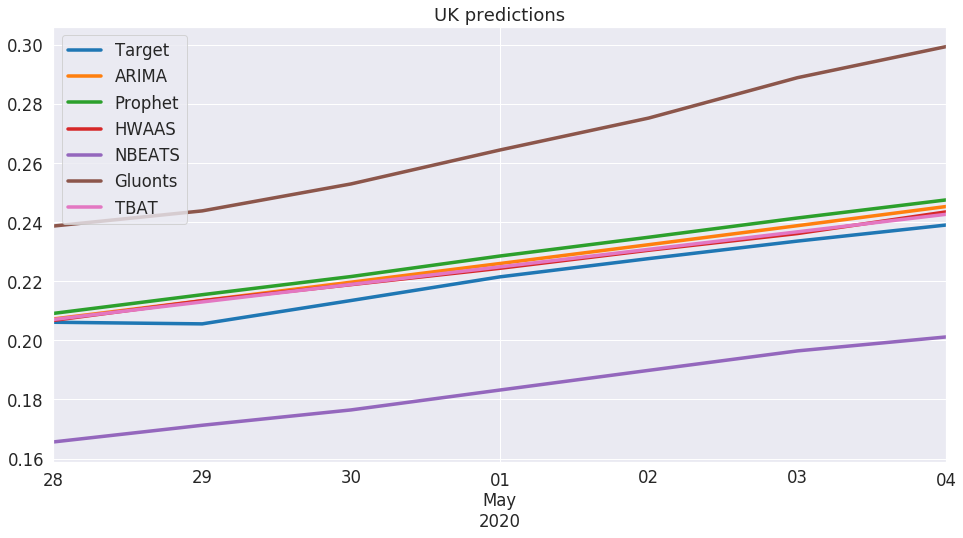

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971762120
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971888200
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968526280
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968105176
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968105624
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.53it/s, avg_epoch_loss=-7.34]
INFO:root:Epoch[0] Elapsed time 3.026 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-7.338700
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.40it/s, avg_epoch_loss=-8.73]
INFO:root:Epoch[1] Elapsed time 2.878 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-8.730563
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.22it/s, avg_epoch_loss=-9.18]
INFO:root:Epoch[2] Elapsed time 2.906 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-9.182971
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.42it/s, avg_epoch_loss=-9.49]
INFO:root:Epoch[3] Elapsed time 2.872 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-9.491291
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.37it/s, avg_epoch_loss=-9

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657967711064
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968620152
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968622168
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657971668920
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657971668416
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 38.30it/s, avg_epoch_loss=-5.58]
INFO:root:Epoch[0] Elapsed time 1.309 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-5.583507
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.82it/s, avg_epoch_loss=-6.66]
INFO:root:Epoch[1] Elapsed time 1.229 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-6.664298
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.62it/s, avg_epoch_loss=-7.2]
INFO:root:Epoch[2] Elapsed time 1.233 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-7.199594
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.32it/s, avg_epoch_loss=-7.21]
INFO:root:Epoch[3] Elapsed time 1.274 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-7.205055
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.59it/s, avg_epoch_loss=-7.54]
INFO:root:Epoch[4] Elapsed time 1.299 seconds
INFO:root:Epo

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003


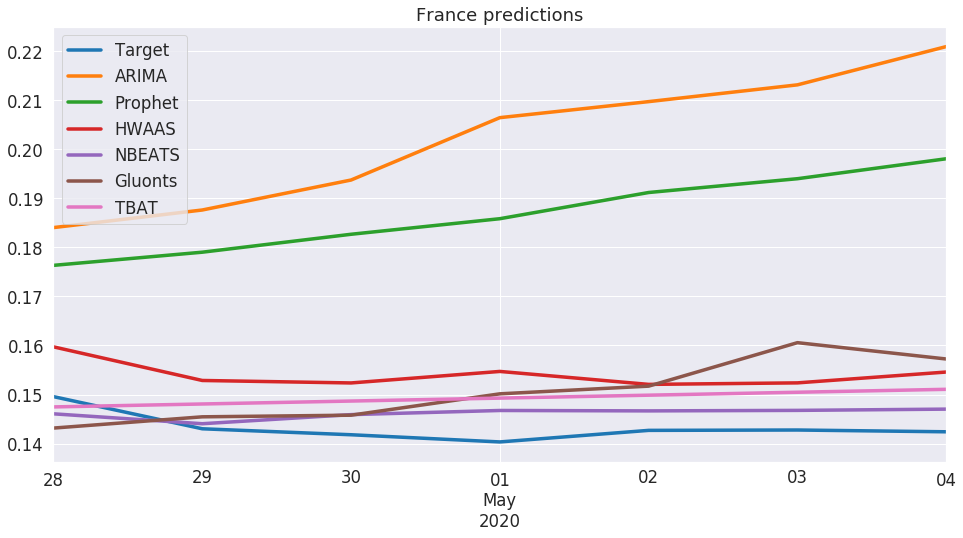

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967711176
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968620768
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967427480
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971888200
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001052032
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.54it/s, avg_epoch_loss=-7.14]
INFO:root:Epoch[0] Elapsed time 3.026 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-7.138880
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.56it/s, avg_epoch_loss=-8.42]
INFO:root:Epoch[1] Elapsed time 2.849 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-8.415589
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.52it/s, avg_epoch_loss=-9.24]
INFO:root:Epoch[2] Elapsed time 2.857 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-9.238635
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.55it/s, avg_epoch_loss=-9.53]
INFO:root:Epoch[3] Elapsed time 2.857 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-9.526952
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.49it/s, avg_epoch_loss=-9

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001319280
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970995440
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657970998632
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001204592
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001202520
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 37.89it/s, avg_epoch_loss=-5.48]
INFO:root:Epoch[0] Elapsed time 1.322 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-5.484137
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.36it/s, avg_epoch_loss=-6.52]
INFO:root:Epoch[1] Elapsed time 1.243 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-6.523400
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.75it/s, avg_epoch_loss=-6.83]
INFO:root:Epoch[2] Elapsed time 1.231 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-6.834095
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.77it/s, avg_epoch_loss=-7.19]
INFO:root:Epoch[3] Elapsed time 1.228 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-7.193755
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.54it/s, avg_epoch_loss=-7.46]
INFO:root:Epoch[4] Elapsed time 1.237 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France,Germany
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824,0.006431
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482,0.037139
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007,0.004586
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220,0.013192
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549,0.057523
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003,0.003389


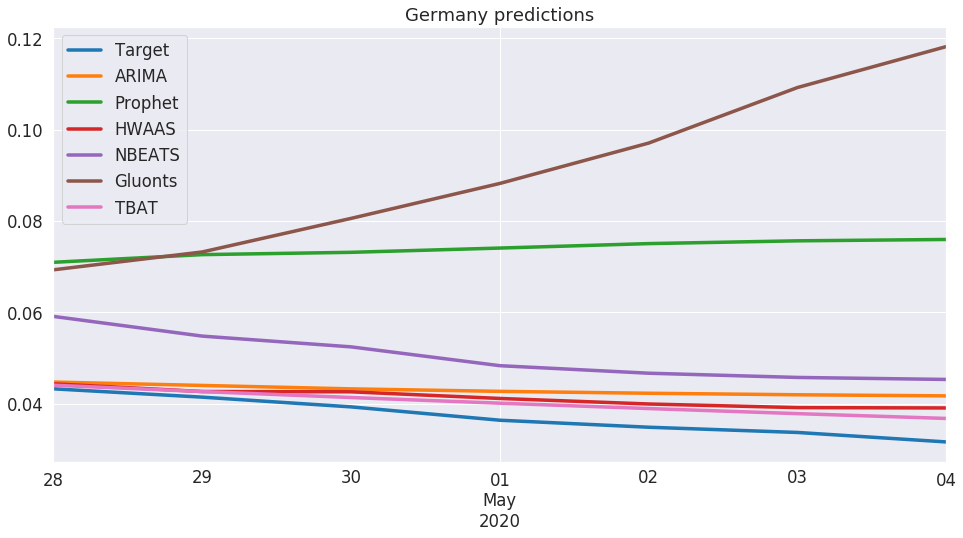

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001422240
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971200968
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971202368
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001318608
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657001320344
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.33it/s, avg_epoch_loss=-11.4]
INFO:root:Epoch[0] Elapsed time 3.063 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-11.423849
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.94it/s, avg_epoch_loss=-12.9]
INFO:root:Epoch[1] Elapsed time 2.953 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-12.884843
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.00it/s, avg_epoch_loss=-13.3]
INFO:root:Epoch[2] Elapsed time 2.944 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-13.295301
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.89it/s, avg_epoch_loss=-13.5]
INFO:root:Epoch[3] Elapsed time 2.962 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-13.509937
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 16.71it/s, avg_epoch_los

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656998425992
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001638432
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001637368
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001637816
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001639216
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 37.26it/s, avg_epoch_loss=-7.61]
INFO:root:Epoch[0] Elapsed time 1.348 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-7.608134
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.53it/s, avg_epoch_loss=-8.91]
INFO:root:Epoch[1] Elapsed time 1.268 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-8.914506
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.58it/s, avg_epoch_loss=-9.16]
INFO:root:Epoch[2] Elapsed time 1.266 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-9.162183
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.87it/s, avg_epoch_loss=-9.46]
INFO:root:Epoch[3] Elapsed time 1.258 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-9.460144
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.54it/s, avg_epoch_loss=-9.5]
INFO:root:Epoch[4] Elapsed time 1.268 seconds
INFO:root:Epo

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France,Germany,Russia
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824,0.006431,0.001536
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482,0.037139,0.014681
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007,0.004586,0.002295
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220,0.013192,0.027078
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549,0.057523,0.034479
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003,0.003389,0.002193


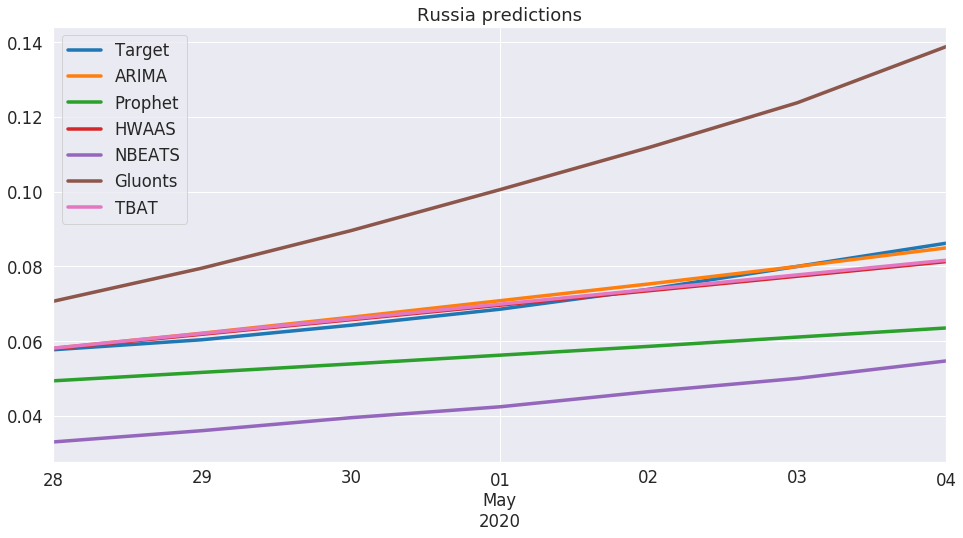

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967787200
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657002049264
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657002045792
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968106128
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968104504
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.13it/s, avg_epoch_loss=-19.3]
INFO:root:Epoch[0] Elapsed time 3.105 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-19.251764
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.61it/s, avg_epoch_loss=-19.7]
INFO:root:Epoch[1] Elapsed time 3.012 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-19.714386
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:03<00:00, 16.59it/s, avg_epoch_loss=-20.4]
INFO:root:Epoch[2] Elapsed time 3.018 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-20.392631
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.22it/s, avg_epoch_loss=-19.4]
INFO:root:Epoch[3] Elapsed time 2.908 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-19.356080
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.17it/s, avg_epoch_los

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657971762008
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657967991944
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139656987432104
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139656987433336
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139656987434344
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 38.04it/s, avg_epoch_loss=-4.26]
INFO:root:Epoch[0] Elapsed time 1.318 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-4.258133
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.85it/s, avg_epoch_loss=-5.63]
INFO:root:Epoch[1] Elapsed time 1.268 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-5.632469
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.23it/s, avg_epoch_loss=-5.92]
INFO:root:Epoch[2] Elapsed time 1.245 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-5.924932
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.69it/s, avg_epoch_loss=-6.32]
INFO:root:Epoch[3] Elapsed time 1.263 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-6.319810
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.68it/s, avg_epoch_loss=-6.32]
INFO:root:Epoch[4] Elapsed time 1.265 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France,Germany,Russia,Turkey
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824,0.006431,0.001536,0.004442
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482,0.037139,0.014681,0.044595
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007,0.004586,0.002295,0.000887
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220,0.013192,0.027078,0.018265
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549,0.057523,0.034479,0.093839
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003,0.003389,0.002193,0.001946


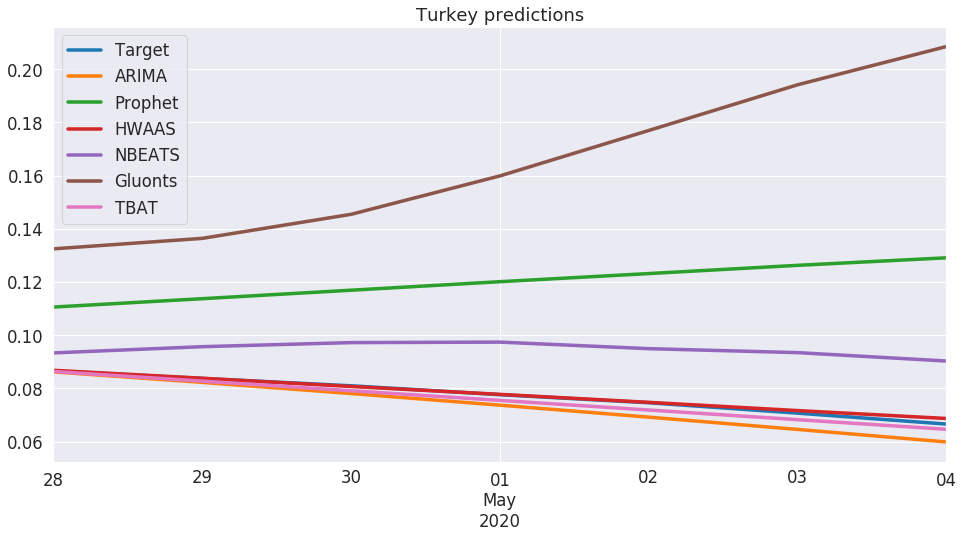

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139656987431208
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967992504
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967989872
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967990992
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967990712
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.36it/s, avg_epoch_loss=-12.9]
INFO:root:Epoch[0] Elapsed time 3.059 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-12.858293
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.36it/s, avg_epoch_loss=-14]
INFO:root:Epoch[1] Elapsed time 2.886 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-13.953565
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.44it/s, avg_epoch_loss=-13.7]
INFO:root:Epoch[2] Elapsed time 2.870 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-13.716755
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.44it/s, avg_epoch_loss=-14.5]
INFO:root:Epoch[3] Elapsed time 2.873 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-14.454952
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.21it/s, avg_epoch_loss=

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657002010104
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657002059704
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657002059312
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657968526000
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657002011616
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 37.72it/s, avg_epoch_loss=-6.59]
INFO:root:Epoch[0] Elapsed time 1.330 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-6.587689
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.86it/s, avg_epoch_loss=-7.53]
INFO:root:Epoch[1] Elapsed time 1.257 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-7.531096
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.74it/s, avg_epoch_loss=-7.93]
INFO:root:Epoch[2] Elapsed time 1.260 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-7.927838
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.38it/s, avg_epoch_loss=-8.05]
INFO:root:Epoch[3] Elapsed time 1.241 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-8.050929
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 40.53it/s, avg_epoch_loss=-8.21]
INFO:root:Epoch[4] Elapsed time 1.242 seconds
INFO:root:Ep

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France,Germany,Russia,Turkey,Brazil
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824,0.006431,0.001536,0.004442,0.004194
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482,0.037139,0.014681,0.044595,0.009279
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007,0.004586,0.002295,0.000887,0.005717
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220,0.013192,0.027078,0.018265,0.010870
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549,0.057523,0.034479,0.093839,0.002836
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003,0.003389,0.002193,0.001946,0.005621


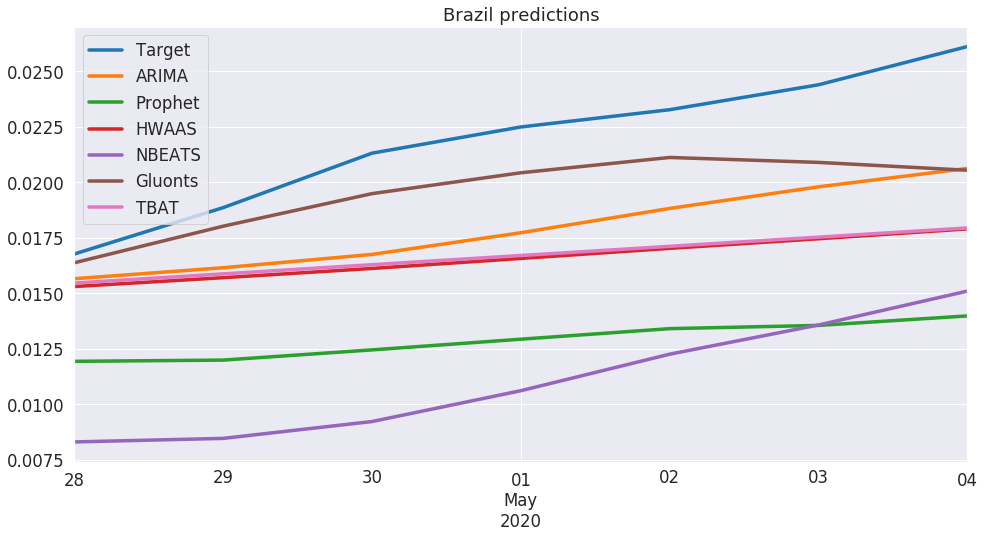

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
72
An insample split of training size 72 and testing size 25 has been constructed
Model ARIMA is being trained for in sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model NBEATS is being trained for in sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968104672
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657971765088
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967992728
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657967991608
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forecast_length=25, share_thetas=False) at @139657968105904
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=25, forec

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]

Model Gluonts is being trained for in sample prediction


INFO:root:Number of parameters in DeepARTrainingNetwork: 25884
100%|██████████| 50/50 [00:03<00:00, 16.17it/s, avg_epoch_loss=-6.07]
INFO:root:Epoch[0] Elapsed time 3.096 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-6.068436
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.19it/s, avg_epoch_loss=-7.65]
INFO:root:Epoch[1] Elapsed time 2.911 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-7.653239
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.02it/s, avg_epoch_loss=-8.17]
INFO:root:Epoch[2] Elapsed time 2.940 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-8.169477
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.11it/s, avg_epoch_loss=-8.26]
INFO:root:Epoch[3] Elapsed time 2.926 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-8.258685
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:02<00:00, 17.15it/s, avg_epoch_loss=-8

Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model Prophet is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model NBEATS is being used to forcast in sample
Model Gluonts is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model NBEATS is being trained for out of sample prediction
| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657971325640
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657001208968
     | -- GenericBlock(units=128, thetas_dim=7, backcast_length=7, forecast_length=7, share_thetas=False) at @139657967322224
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657967324184
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, forecast_length=7, share_thetas=False) at @139657967322728
     | -- GenericBlock(units=128, thetas_dim=8, backcast_length=7, fore

INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:root:Number of parameters in DeepARTrainingNetwork: 25884


Model Gluonts is being trained for out of sample prediction


100%|██████████| 50/50 [00:01<00:00, 35.40it/s, avg_epoch_loss=-3.95]
INFO:root:Epoch[0] Elapsed time 1.415 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=-3.946100
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.29it/s, avg_epoch_loss=-5.21]
INFO:root:Epoch[1] Elapsed time 1.308 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=-5.210518
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 37.86it/s, avg_epoch_loss=-5.65]
INFO:root:Epoch[2] Elapsed time 1.326 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=-5.646207
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 39.67it/s, avg_epoch_loss=-5.8]
INFO:root:Epoch[3] Elapsed time 1.264 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=-5.802574
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:01<00:00, 38.85it/s, avg_epoch_loss=-5.97]
INFO:root:Epoch[4] Elapsed time 1.289 seconds
INFO:root:Epo

Model TBAT is being trained for out of sample prediction
Model ARIMA is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model NBEATS is being used to forcast out of sample
Model Gluonts is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Successfully finished out of sample forecast


,US,Spain,Italy,UK,France,Germany,Russia,Turkey,Brazil,Iran
ARIMA,0.007421,0.080094,0.005628,0.005484,0.060824,0.006431,0.001536,0.004442,0.004194,0.002628
Prophet,0.013877,0.065433,0.019217,0.007634,0.044482,0.037139,0.014681,0.044595,0.009279,0.016281
HWAAS,0.172957,0.031497,0.006616,0.004366,0.011007,0.004586,0.002295,0.000887,0.005717,0.001046
NBEATS,0.036958,0.050492,0.008645,0.037623,0.004220,0.013192,0.027078,0.018265,0.010870,0.003745
Gluonts,0.044805,0.108842,0.043551,0.046134,0.010549,0.057523,0.034479,0.093839,0.002836,0.002277
TBAT,0.009873,0.029295,0.005810,0.004310,0.007003,0.003389,0.002193,0.001946,0.005621,0.000425


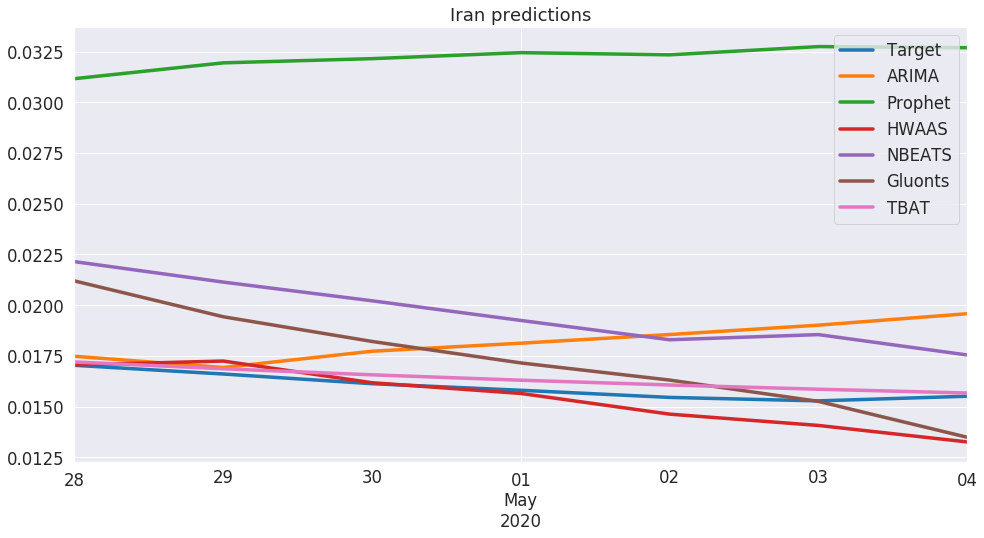

In [4]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

model_list=["ARIMA", "Prophet", "HWAAS", "NBEATS", "Gluonts", "TBAT"]
df_performances = pd.DataFrame()
forecast_len = 7
for name in top_n_country_names:
    #Isolate country >> set date as index cause it needed >> reindex by date range >> fillna
    df = top_n[top_n['country'] == name].set_index('date')['population_percentage'].reindex(date_range).fillna(0)
    df_train = df.iloc [:-forecast_len]
    df_test = df.iloc [-forecast_len:]

    #Percentage of Infected
    am = AutomatedModel(df = df_train , model_list=model_list ,forecast_len=len(df_test))
    forecast_in, performance = am.forecast_insample()
    forecast_out = am.forecast_outsample()

    def root_mean_squared_error(series):
    return np.sqrt(mean_squared_error(df_test, series))

    forecast_out.fillna(0, inplace=True)
    df_performances[name] = forecast_out.apply(root_mean_squared_error)
    display(df_performances)

    #Plot
    forecast_out['Target'] = df_test
    cols = forecast_out.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    forecast_out = forecast_out[cols]
    forecast_out.plot(title=name+" predictions", figsize=(16,8))
    plt.savefig("figures/"+name+".png")
    plt.show()

In [0]:
def highlight_min(data, color='yellow'):
    '''
    highlight the minimum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
        
df_performances.style.apply(highlight_min).to_excel('Results.xlsx')

In [7]:
print (df_performances.iloc[:, :5].to_latex())

print (df_performances.iloc[:, 5:].to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &        US &     Spain &     Italy &        UK &    France \\
\midrule
ARIMA   &  0.007421 &  0.080094 &  0.005628 &  0.005484 &  0.060824 \\
Prophet &  0.013877 &  0.065433 &  0.019217 &  0.007634 &  0.044482 \\
HWAAS   &  0.172957 &  0.031497 &  0.006616 &  0.004366 &  0.011007 \\
NBEATS  &  0.036958 &  0.050492 &  0.008645 &  0.037623 &  0.004220 \\
Gluonts &  0.044805 &  0.108842 &  0.043551 &  0.046134 &  0.010549 \\
TBAT    &  0.009873 &  0.029295 &  0.005810 &  0.004310 &  0.007003 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
{} &   Germany &    Russia &    Turkey &    Brazil &      Iran \\
\midrule
ARIMA   &  0.006431 &  0.001536 &  0.004442 &  0.004194 &  0.002628 \\
Prophet &  0.037139 &  0.014681 &  0.044595 &  0.009279 &  0.016281 \\
HWAAS   &  0.004586 &  0.002295 &  0.000887 &  0.005717 &  0.001046 \\
NBEATS  &  0.013192 &  0.027078 &  0.018265 &  0.010870 &  0.003745 \\
Gluonts &  0.057523 &  0.034479 &  0.093839 &  

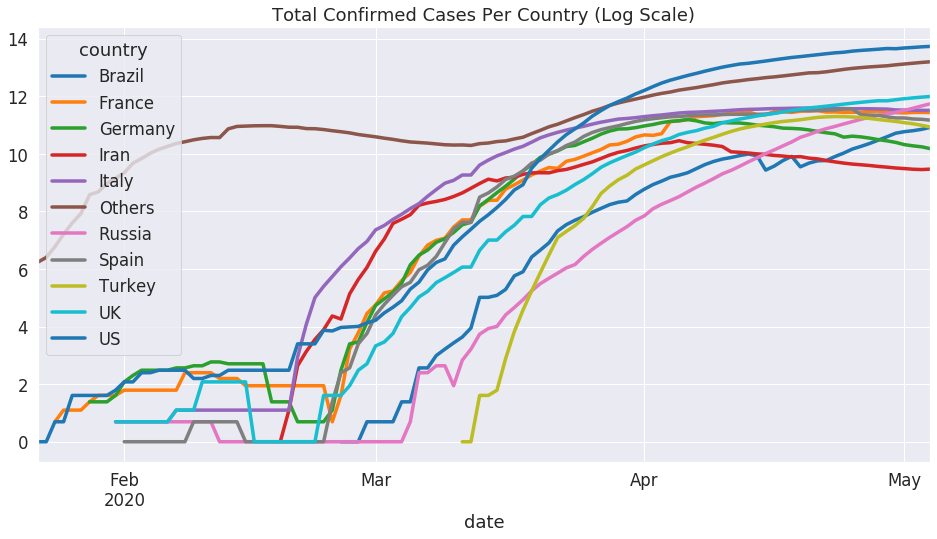

In [9]:
from math import log
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})


others = data [~data['country'].isin(top_n_country_names)].groupby('date').sum().reset_index()
others['country'] = 'Others'
for_plot = pd.concat([top_n, others])
for_plot = for_plot.drop(['population', 'population_percentage'], axis=1)

def log_if(x):
    if x >= 1:
        return log(x)
    else:
        return 0 
for_plot['confirmed'] = for_plot['active'].apply(lambda x: log_if(x))
for_plot.groupby(['country', 'date'])['confirmed'].sum().unstack('country').plot(title='Total Confirmed Cases Per Country (Log Scale)', figsize=(16,8))
plt.show()